In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df =pd.read_csv(r'C:\Users\Sameriah\Python_myWork\project\Comcast telecom\project_data.csv')
df.rename( columns={'Ticket #':'Ticket'} ,inplace=True)
df['Customer Complaint'] = df['Customer Complaint'].str.lower()
df.inplace = True
df.head(4)

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,comcast cable internet speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,speed and service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,comcast imposed a new usage cap of 300gb that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes


In [3]:
df['Date'] = pd.to_datetime(df['Date_month_year'])
df['Month'] = df['Date'].dt.month
df['Month'].inplace = True  
df['Day'] =df['Date'].dt.day
df['Day'].inplace = True 
df.head(4)

#df.info()
#df.shape
#df[df['Month'] == 1].index.tolist() #getting all the row number of complaints made at jan

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5


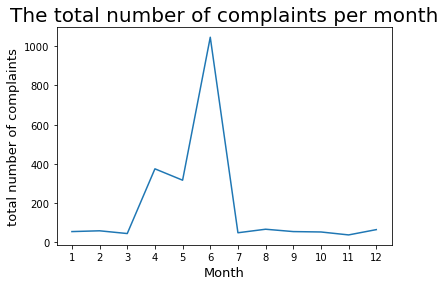

In [25]:
num_ofComplain_month = df['Month'].value_counts().to_frame().reset_index().sort_values('index')
plt.plot(num_ofComplain_month['index'], num_ofComplain_month['Month'])
plt.title('The total number of complaints per month',fontsize = 20)
plt.ylabel('total number of complaints',fontsize = 13)
plt.xlabel('Month',fontsize = 13)
plt.xticks(range(1,13))
#plt.savefig('max_complaint_month.png')
plt.show()


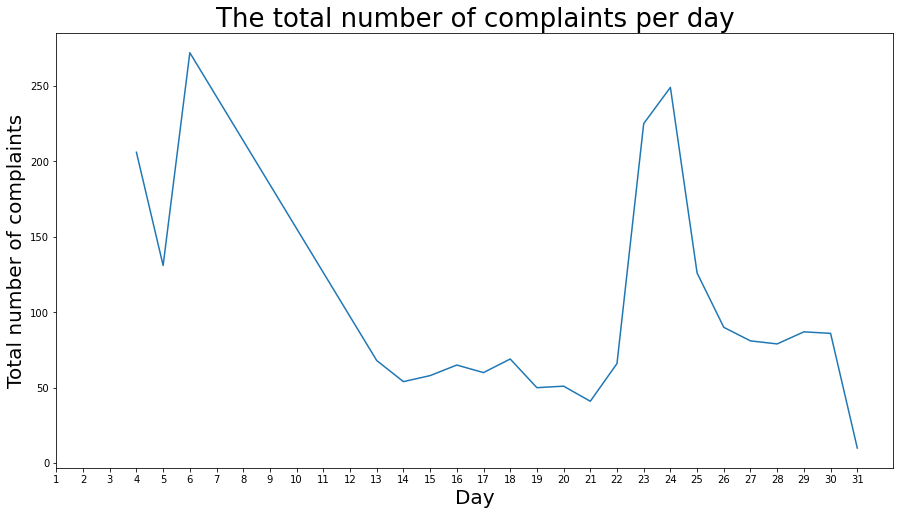

In [26]:
num_ofComplain_day = df['Day'].value_counts().to_frame().reset_index().sort_values('index')

fig =plt.figure(figsize =(15,8)) #resize the frame of the graph
plt.plot(num_ofComplain_day['index'], num_ofComplain_day['Day'])
plt.title('The total number of complaints per day', fontsize = 26)
plt.ylabel('Total number of complaints',fontsize = 20)
plt.xlabel('Day',fontsize = 20)
plt.xticks(range(1,32))
#plt.savefig('max_complaint_day.png')
plt.show()

In [6]:
zz =df[['Customer Complaint', 'Ticket']].groupby(['Customer Complaint'], as_index = False).count().sort_values('Ticket', ascending = False)
#zz.shape
#zz.loc[zz.Ticket == zz.Ticket.max()]
zz.iat[0,0]

'comcast'

In [7]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [8]:
def case_status(a):
    if a in ['Open', 'Pending']:
        return 'Opened'
    else:
        return 'Closed'

In [9]:
df['case_status']= df['Status'].apply(case_status)
df['case_status'].inplace = True
df.head()

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,case_status
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Closed
1,223441,payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Opened
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Closed


In [10]:
df_state = df[(df.Month == 7) | (df.Month == 8) | (df.Month == 9) ]
df_state.head(4)

,Ticket,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,case_status
1,223441,payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Opened
20,327657,internet out all the time but they have a mono...,2015-07-06,06-Jul-15,8:55:43 PM,Customer Care Call,Alexandria,Virginia,22305,Solved,No,7,6,Closed
21,328742,horrible cable service and customer service,2015-08-06,06-Aug-15,3:18:58 PM,Internet,Alexandria,Virginia,22312,Solved,No,8,6,Closed


In [11]:
state_withMax_complaint=df_state[['State', 'Ticket']].groupby(['State'], as_index = False).count().sort_values('Ticket', ascending = False)
state_withMax_complaint.iat[0,0]
state_withMax_complaint.head(2)

,State,Ticket
4,Florida,30
5,Georgia,21


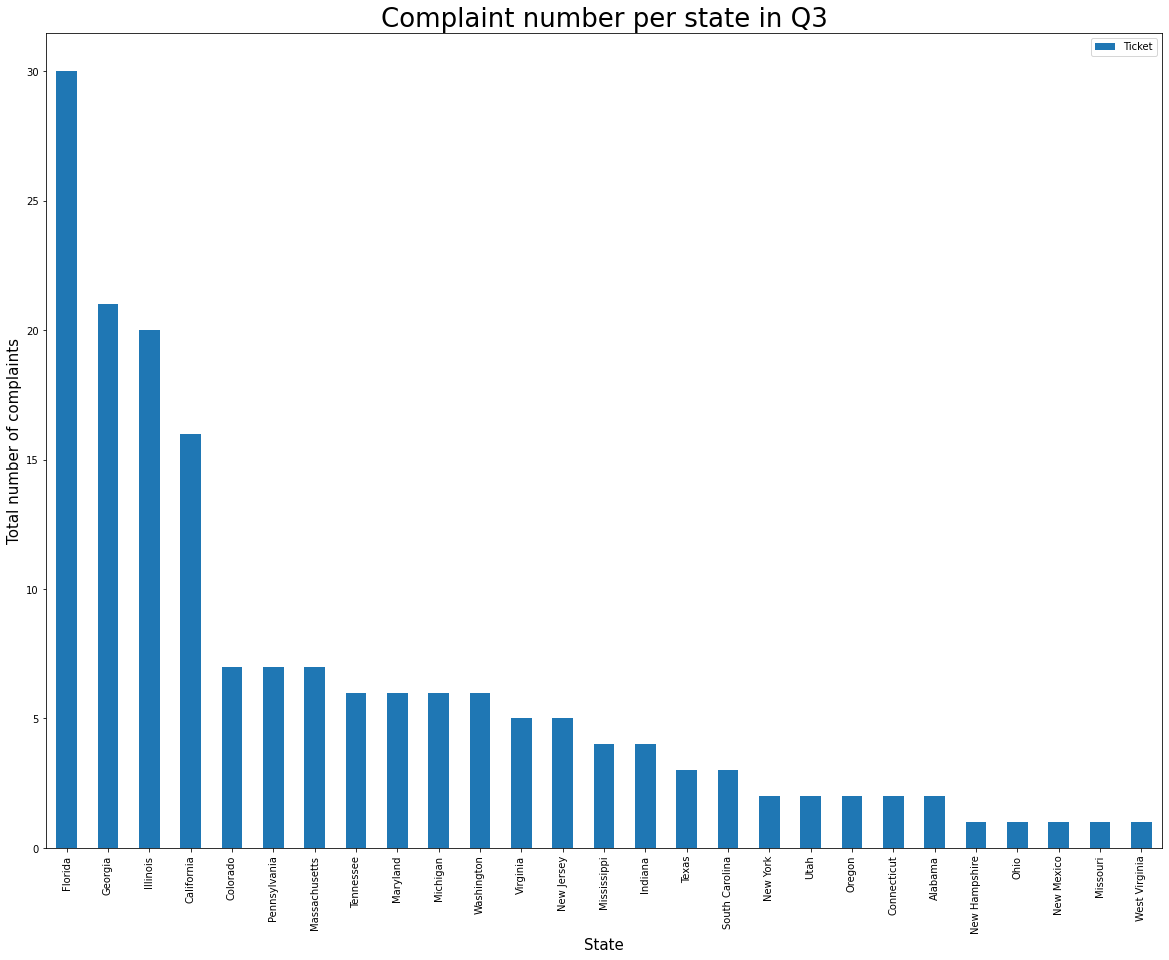

In [37]:
state_withMax_complaint.plot.bar(x='State', y='Ticket', figsize=(20, 15))
plt.xticks(rotation=90)
plt.title('Complaint number per state in Q3', fontsize = 26)
plt.ylabel('Total number of complaints',fontsize = 15)
plt.xlabel('State',fontsize = 15)
#plt.savefig('state_withMax_complaint.png')
plt.show()

In [13]:
unrsolved = df_state.groupby(['State','case_status'],as_index =False)['Ticket'].count()
unrsolved.head(10)

,State,case_status,Ticket
0,Alabama,Closed,2
1,California,Closed,15
2,California,Opened,1
3,Colorado,Closed,7
4,Connecticut,Closed,2
5,Florida,Closed,26
6,Florida,Opened,4
7,Georgia,Closed,19
8,Georgia,Opened,2
9,Illinois,Closed,20


In [14]:
unrsolved = unrsolved[unrsolved['case_status'] == 'Opened']
unrsolved =pd.merge(unrsolved, state_withMax_complaint, how = 'inner', on = 'State')
unrsolved.head(10)


,State,case_status,Ticket_x,Ticket_y
0,California,Opened,1,16
1,Florida,Opened,4,30
2,Georgia,Opened,2,21
3,Maryland,Opened,1,6
4,Massachusetts,Opened,1,7
5,New Jersey,Opened,2,5
6,South Carolina,Opened,1,3
7,Tennessee,Opened,1,6
8,Utah,Opened,1,2
9,Washington,Opened,1,6


In [15]:
unrsolved.rename( columns={'Ticket_x':'unrsolved_cases'} ,inplace=True)
unrsolved.rename( columns={'Ticket_y':'Total_cases'} ,inplace=True)
unrsolved['percentage_of_unrsolved']= ((unrsolved.unrsolved_cases/unrsolved.Total_cases)*100).round(decimals=0)
unrsolved.sort_values(by=['percentage_of_unrsolved'],ascending=False, inplace=True)
unrsolved.head(10)


,State,case_status,unrsolved_cases,Total_cases,percentage_of_unrsolved
8,Utah,Opened,1,2,50.0
5,New Jersey,Opened,2,5,40.0
6,South Carolina,Opened,1,3,33.0
3,Maryland,Opened,1,6,17.0
7,Tennessee,Opened,1,6,17.0
9,Washington,Opened,1,6,17.0
4,Massachusetts,Opened,1,7,14.0
1,Florida,Opened,4,30,13.0
2,Georgia,Opened,2,21,10.0
0,California,Opened,1,16,6.0


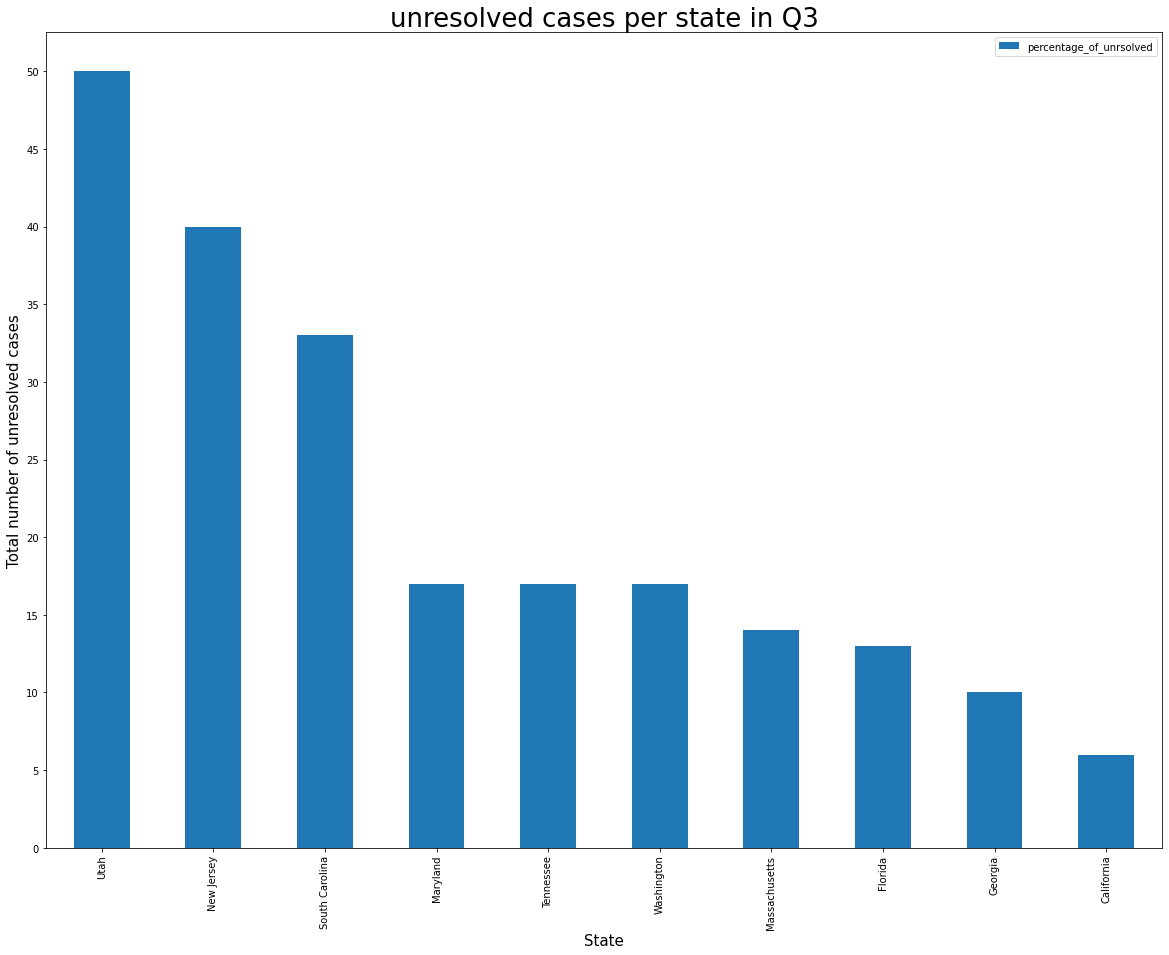

In [40]:
unrsolved.plot.bar(x='State', y='percentage_of_unrsolved', figsize=(20, 15))
plt.yticks(range(0,55,5))
plt.title('unresolved cases per state in Q3', fontsize = 26)
plt.ylabel('Total number of unresolved cases',fontsize = 15)
plt.xlabel('State',fontsize = 15)
plt.savefig('unrsolved_complaint.png')
plt.show()

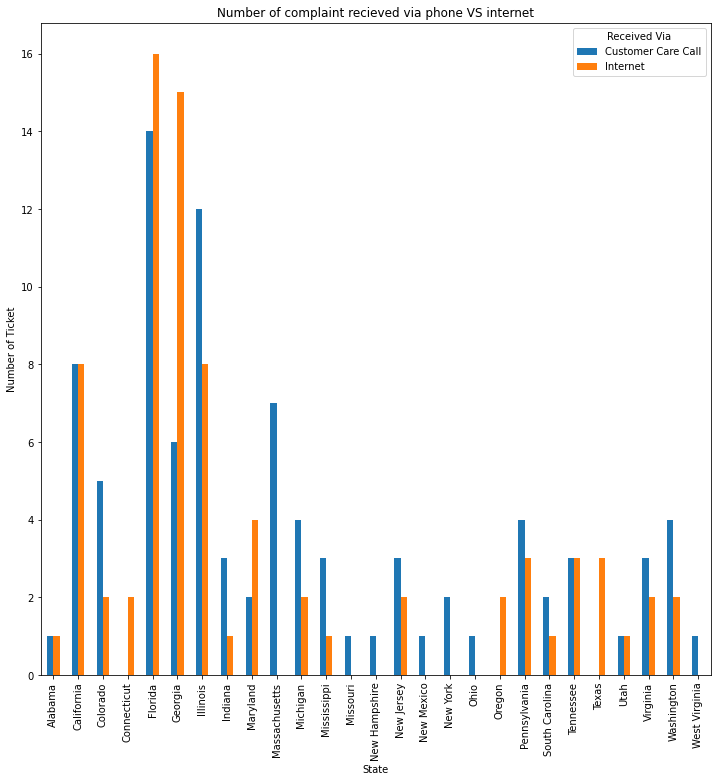

In [41]:
rec_via = pd.pivot_table(df_state, values = 'Ticket', index = 'State', columns = 'Received Via',aggfunc = lambda x: len(x))
ax = rec_via.plot.bar( title = "Number of complaint recieved via phone VS internet",xlabel = "State",ylabel='Number of Ticket', figsize=[12,12])
#plt.savefig('Number of complaint recieved via phone VS internet.png')
plt.show()

In [42]:
#end